# Step 1: Importing Necessary Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Loading the Dataset

In [31]:
Data = pd.read_csv(r'C:\Users\Lapotop Land\Downloads\StudentsPerformance.csv')

In [32]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


# Step 3: Exploratory Data Analysis (EDA)

## 3.1 Understanding the Data Structure

### 3.1.1 Displaying the Shape of Dataset (Number of Rows and Columns)

In [33]:
Data.shape

(1000, 8)

### 3.1.2 Displaying the Column Names

In [34]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 3.1.3 Checking the Data Types

In [35]:
Data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                    int64
writing score                    int64
dtype: object

### 3.1.4 Checking Unique Values in Categorical Columns

In [36]:
print("Unique Values in Gender: ", Data['gender'].unique())

Unique Values in Gender:  ['female' 'male']


In [37]:
print("Unique Values in Race/Ethnicity: ", Data['race/ethnicity'].unique())

Unique Values in Race/Ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [38]:
print("Unique Values in Parental Level of Education: ", Data['parental level of education'].unique())

Unique Values in Parental Level of Education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


### 3.1.5 Summary Statistics 

In [39]:
Data.describe()

,math score,reading score,writing score
count,961.000000,1000.000000,1000.000000
mean,66.131113,69.169000,68.054000
std,14.981012,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### 3.1.6 Checking for Missing Values

In [40]:
Data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     39
reading score                   0
writing score                   0
dtype: int64

### 3.1.7 Checking for Duplicate Data

In [41]:
Data.duplicated().sum()

0

# Step 4: Data Cleaning

### 4.2.1 Handling the Missing Values

In [17]:
imputer = SimpleImputer(strategy='mean')

In [18]:
Data['math score'] = imputer.fit_transform(Data[['math score']])

In [19]:
Data['math score'].isnull().sum()

0

### 4.2.2 Dropping Unnecessary Columns

In [20]:
Data = Data.drop(['lunch', 'test preparation course'], axis=1)

### 4.2.3 Verifying the Dropped Columns

In [21]:
Data.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
0,female,group B,bachelor's degree,72.0,72,74
1,female,group C,some college,69.0,90,88
2,female,group B,master's degree,90.0,95,93
3,male,group A,associate's degree,47.0,57,44
4,male,group C,some college,76.0,78,75


### 4.2.4 Converting Categorical Data to Numerical Format

In [28]:
# Creating a label encoder object
le = LabelEncoder()

# Applying Label Encoding to the categorical columns
Data['gender'] = le.fit_transform(Data['gender'])
Data['race/ethnicity'] = le.fit_transform(Data['race/ethnicity'])
Data['parental level of education'] = le.fit_transform(Data['parental level of education'])

# Step 5: Data Visualization

## 5.1 Distribution of Math, Reading, and Writing Scores

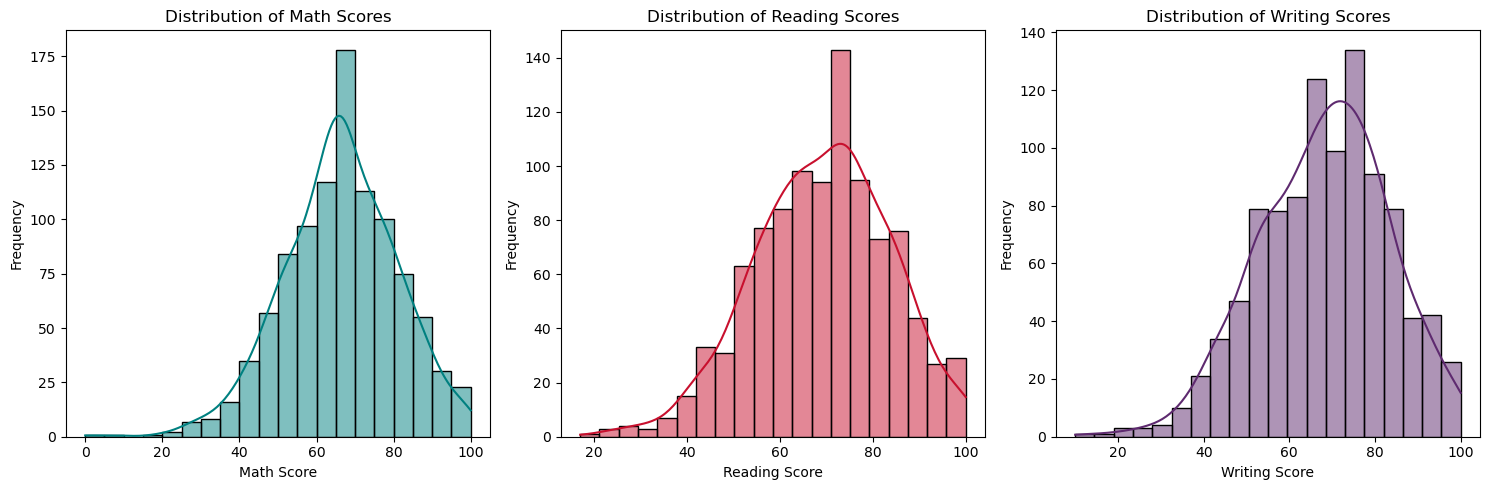

In [19]:
# Plotting the distribution of math, reading, and writing scores
plt.figure(figsize=(15, 5)) 

# Math score distribution 
plt.subplot(1, 3, 1) 
sns.histplot(Data['math score'], kde=True, color='teal', bins=20) 
plt.title('Distribution of Math Scores') 
plt.xlabel('Math Score') 
plt.ylabel('Frequency') 

# Reading score distribution 
plt.subplot(1, 3, 2) 
sns.histplot(Data['reading score'], kde=True, color='#c8102e', bins=20)
plt.title('Distribution of Reading Scores') 
plt.xlabel('Reading Score') 
plt.ylabel('Frequency')

# Writing score distribution 
plt.subplot(1, 3, 3) 
sns.histplot(Data['writing score'], kde=True, color='#5e2a6f', bins=20) 
plt.title('Distribution of Writing Scores') 
plt.xlabel('Writing Score') 
plt.ylabel('Frequency') 
plt.tight_layout() 
plt.show()

## 5.2 Comparison of Math, Reading, and Writing Scores by Gender

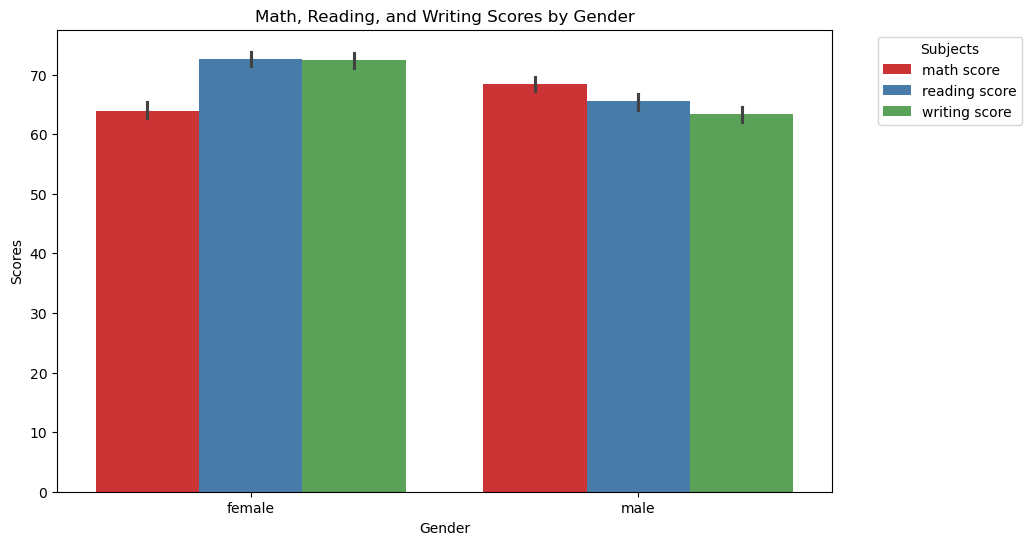

In [20]:
# Grouped bar plot for Math, Reading, and Writing scores by Gender
plt.figure(figsize=(10, 6))
subject_scores = ['math score', 'reading score', 'writing score']
sns.barplot(x='gender', y='value', hue='variable', 
            data=pd.melt(Data, id_vars='gender', value_vars=subject_scores), palette='Set1')

plt.title('Math, Reading, and Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Scores')
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5.3 Relationships Between Math Scores and Other Subjects by Gender

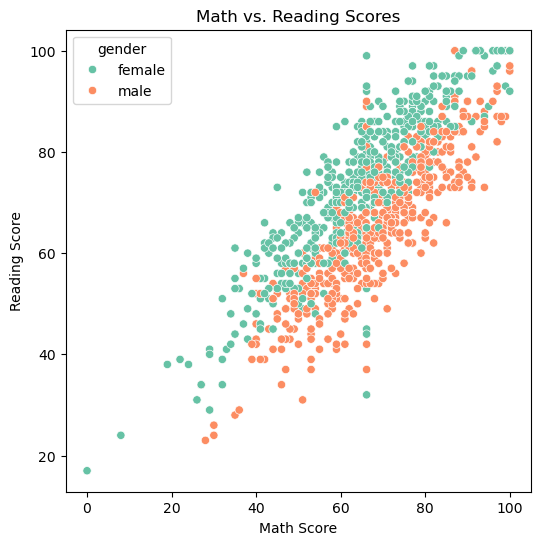

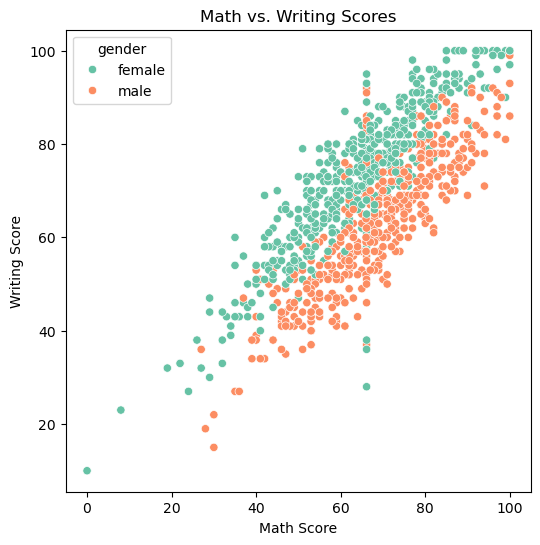

In [21]:
# Scatter plot: Math vs. Reading scores
plt.figure(figsize=(6, 6))
sns.scatterplot(x='math score', y='reading score', hue='gender', data=Data, palette='Set2')
plt.title('Math vs. Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

# Scatter plot: Math vs. Writing scores
plt.figure(figsize=(6, 6))
sns.scatterplot(x='math score', y='writing score', hue='gender', data=Data, palette='Set2')
plt.title('Math vs. Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()